<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [2]:
dataset = pd.read_csv('Dados/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [3]:
dataset.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [4]:
print('Nossa base de dados posssui {} linhas e {} colunas'.format(dataset.shape[0], dataset.shape[1]))

Nossa base de dados posssui 1000 linhas e 7 colunas


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dataset.describe().round(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000,1000.000,1000.000,1000.00,1000.000,1000.000,1000.000
mean,41985.600,124.326,2.009,3.00,2.034,0.331,0.485
std,12140.385,72.390,0.813,1.43,1.419,0.471,0.500
min,13150.000,1.000,1.000,1.00,0.000,0.000,0.000
25%,33112.500,60.750,1.000,2.00,1.000,0.000,0.000
50%,41725.000,123.000,2.000,3.00,2.000,0.000,0.000
75%,51175.000,187.000,3.000,4.00,3.000,1.000,1.000
max,73675.000,249.000,3.000,5.00,4.000,1.000,1.000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [6]:
dataset.corr().round(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000,0.118,0.103,0.124,0.107,0.431,0.632
area,0.118,1.000,-0.008,-0.011,0.012,-0.015,-0.018
garagem,0.103,-0.008,1.000,0.067,0.060,-0.016,-0.021
banheiros,0.124,-0.011,0.067,1.000,0.048,-0.025,-0.018
lareira,0.107,0.012,0.060,0.048,1.000,0.030,-0.004
marmore,0.431,-0.015,-0.016,-0.025,0.030,1.000,-0.007
andares,0.632,-0.018,-0.021,-0.018,-0.004,-0.007,1.000


1. A variável mais correlacionada com a variável dependente (Preço) é a variável explicativa andares.
2. Parece que ter mais que um andar é um fator que aumenta a variável dependente (rp

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [7]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [8]:
sns.set_palette("bright")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Variação de preços dos imóveis'}, ylabel='Preço (U$)'>

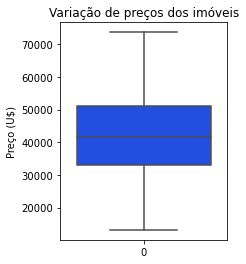

In [19]:
ax = sns.boxplot(data=dataset['precos'])
ax.figure.set_size_inches(3,4)
ax.set_title('Variação de preços dos imóveis')
ax.set_ylabel('Preço (U$)')
ax

1. Pelo boxplot gerado parece não existir outliers.
2. O boxplot indica que a mediana de preço está por volta dos U$ 40.000,00

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<AxesSubplot:title={'center':'Preço x Nº de Garagens'}, xlabel='Numero de garagens', ylabel='Preço (U$)'>

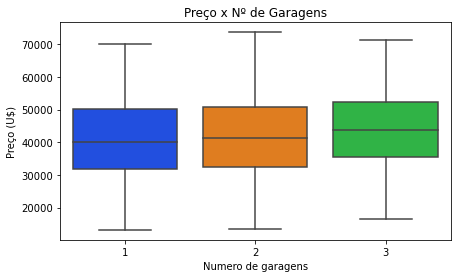

In [24]:
ax = sns.boxplot(y=dataset['precos'], x=dataset['garagem'])
ax.figure.set_size_inches(7,4)
ax.set_title('Preço x Nº de Garagens')
ax.set_ylabel('Preço (U$)')
ax.set_xlabel('Numero de garagens')
ax

Imóveis com 3 garagens parece ter o preço levemente superior do que os demais

### Box-plot (Preço X Banheiros)

<AxesSubplot:title={'center':'Preço x Nº de Banheiros'}, xlabel='Numero de banheiros', ylabel='Preço (U$)'>

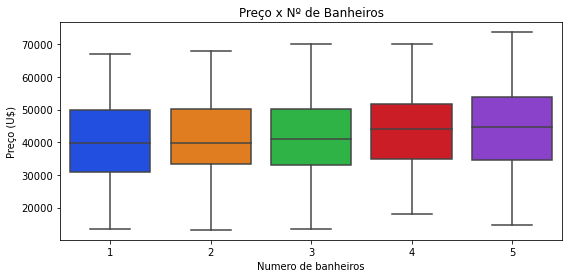

In [26]:
ax = sns.boxplot(y=dataset['precos'], x=dataset['banheiros'])
ax.figure.set_size_inches(9,4)
ax.set_title('Preço x Nº de Banheiros')
ax.set_ylabel('Preço (U$)')
ax.set_xlabel('Numero de banheiros')
ax

O preço parece aumentar levemente quando se aumenta o Nº de banheiros

### Box-plot (Preço X Lareira)

<AxesSubplot:title={'center':'Preço x Nº de Lareiras'}, xlabel='Numero de lareiras', ylabel='Preço (U$)'>

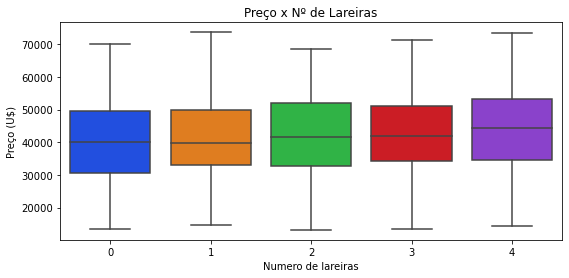

In [27]:
ax = sns.boxplot(y=dataset['precos'], x=dataset['lareira'])
ax.figure.set_size_inches(9,4)
ax.set_title('Preço x Nº de Lareiras')
ax.set_ylabel('Preço (U$)')
ax.set_xlabel('Numero de lareiras')
ax

O número de lareiras no imóvel parece não ser um fator tão relevante para o aumento de valor do imóvel

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot:title={'center':'Preço x Acabamento em Marmóre'}, xlabel='Tem acabamento em Marmóre ?', ylabel='Preço (U$)'>

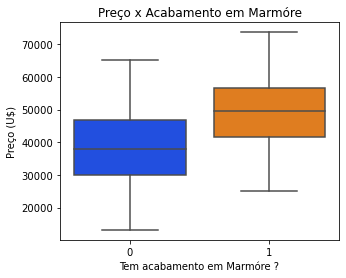

In [30]:
ax = sns.boxplot(y=dataset['precos'], x=dataset['marmore'])
ax.figure.set_size_inches(5,4)
ax.set_title('Preço x Acabamento em Marmóre')
ax.set_ylabel('Preço (U$)')
ax.set_xlabel('Tem acabamento em Marmóre ?')
ax

A casa ter acabamento em marmóre parece um fator muito relevante para o aumento do valor do imóvel.

### Box-plot (Preço X Andares)

<AxesSubplot:title={'center':'Preço x Andares'}, xlabel='Tem mais de um andar ?', ylabel='Preço (U$)'>

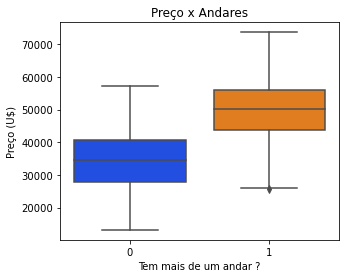

In [31]:
ax = sns.boxplot(y=dataset['precos'], x=dataset['andares'])
ax.figure.set_size_inches(5,4)
ax.set_title('Preço x Andares')
ax.set_ylabel('Preço (U$)')
ax.set_xlabel('Tem mais de um andar ?')
ax

Assim como visto na forte correlação relatada anteriormente, o imóvel possuir mais de um andar é determinante para o aumento do valor do imóvel.

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:title={'center':'Distribuição de Frequência - Nº Imóveis x Valor'}, xlabel='Valor do Imóvel (U$)', ylabel='Nº de Imóveis'>

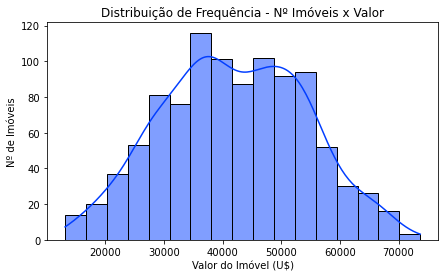

In [38]:
ax = sns.histplot(data=dataset['precos'], kde = True)
ax.figure.set_size_inches(7,4)
ax.set_title('Distribuição de Frequência - Nº Imóveis x Valor')
ax.set_ylabel('Nº de Imóveis')
ax.set_xlabel('Valor do Imóvel (U$)')
ax

A distribuição parece seguir uma distribuição normal

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

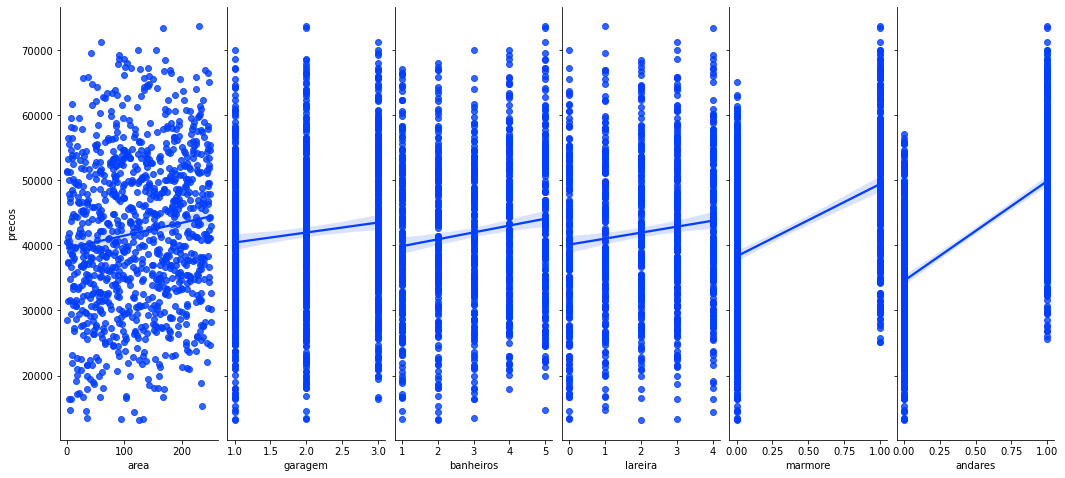

In [45]:
ax = sns.pairplot(data=dataset, x_vars=['area', 'garagem','banheiros','lareira','marmore','andares'], 
                  y_vars=['precos'], kind='reg')
ax.figure.set_size_inches(15,8)
ax

1. A variável dependente parece aumentar quando todas as demais variáveis explicativas também aumentam
2. A relação entre a variável dependente e todas as outras variáveis dependentes são positivas
3. Conforme visto na matriz de correlação, o imóvel possuir acabamento em mármore ou mais de um andar impacta diretamente no valor do imóvel

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Criando uma Series (pandas) para armazenar a variável dependente (y)

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

## Criando os datasets de treino e de teste

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando a classe *LinearRegression()*

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

## Salvando o modelo estimado

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```